In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Useful starting lines
%matplotlib inline
import numpy as np
# import scipy
# import scipy.io
# import scipy.sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
dat_dir = '../data/'
sub_dir = '../submit/'

## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [3]:
from pre_post_process import *

_, ratings = load_data(dat_dir + "data_train.csv")
sample_ids, _ = load_data(dat_dir + "sample_submission.csv")
print(np.shape(ratings))

number of items: 1000, number of users: 10000
number of items: 1000, number of users: 10000
(1000, 10000)


### Split the data into a train and test set

In [4]:
valid_ratings, train, test = split_data(ratings, p_test=0.1)

the shape of original ratings. (# of row, # of col): (1000, 10000)
the shape of valid ratings. (# of row, # of col): (1000, 10000)
Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1068598
Total number of nonzero elements in test data:108354


### Finding parameters for SGD

In [5]:
from SGD_helpers import init_MF, matrix_factorization_SGD

We need to find the values of the step size $\gamma$ first for a fixed value of the 3 other parameters and then compute a grid search to find the best parameters for the regularizers $\lambda_{user}$, $\lambda_{item}$ (both between 0 and 1) and the number of features $K$

In [6]:
# Finding gamma:
gammas = np.logspace(-5,-1,5)
K = 50
lambda_user = 0.01
lambda_item = 0.01
num_epochs = 20
errors = []

for gamma in gammas:
    # Initialize features matrix
    user_init, item_init = init_MF(train, K)
    # Compute SGD
    _, _, rmse = matrix_factorization_SGD(train, test, gamma, K, lambda_user, lambda_item, num_epochs, user_init, item_init)
    errors.append(rmse)

Learn the matrix factorization using SGD with K = 50, lambda_i = 0.01, lambda_u = 0.01, num_epochs = 20
iter: 0, RMSE on training set: 4.010824468379098.
iter: 5, RMSE on training set: 4.009810800453943.
iter: 10, RMSE on training set: 4.009387429041975.
iter: 15, RMSE on training set: 4.009214472454605.
iter: 19, RMSE on training set: 4.009153914857021.
RMSE on test data: 4.013052009085576.
Learn the matrix factorization using SGD with K = 50, lambda_i = 0.01, lambda_u = 0.01, num_epochs = 20
iter: 0, RMSE on training set: 4.007592440513288.
iter: 5, RMSE on training set: 3.989674827963399.
iter: 10, RMSE on training set: 3.9767103102659362.
iter: 15, RMSE on training set: 3.9699985436600844.
iter: 19, RMSE on training set: 3.9674201344576936.
RMSE on test data: 3.971264399836704.
Learn the matrix factorization using SGD with K = 50, lambda_i = 0.01, lambda_u = 0.01, num_epochs = 20
iter: 0, RMSE on training set: 3.837643355350549.
iter: 5, RMSE on training set: 1.1710717132071373.
it

/Users/luke/Documents/Projects/ML/project2/MRS/src/SGD_helpers.py:57: RuntimeWarning: overflow encountered in multiply
  
/Users/luke/Documents/Projects/ML/project2/MRS/src/SGD_helpers.py:58: RuntimeWarning: overflow encountered in multiply
  rmse = compute_error(train, user_features, item_features, nz_train)
/Users/luke/Documents/Projects/ML/project2/MRS/src/SGD_helpers.py:58: RuntimeWarning: invalid value encountered in subtract
  rmse = compute_error(train, user_features, item_features, nz_train)
/Users/luke/Documents/Projects/ML/project2/MRS/src/SGD_helpers.py:57: RuntimeWarning: invalid value encountered in add
  


iter: 0, RMSE on training set: nan.
iter: 5, RMSE on training set: nan.
iter: 10, RMSE on training set: nan.
iter: 15, RMSE on training set: nan.
iter: 19, RMSE on training set: nan.
RMSE on test data: nan.
Learn the matrix factorization using SGD with K = 50, lambda_i = 0.01, lambda_u = 0.01, num_epochs = 20
iter: 0, RMSE on training set: nan.
iter: 5, RMSE on training set: nan.
iter: 10, RMSE on training set: nan.


KeyboardInterrupt: 

After many computations (not only on logspace) for same parameters for K and the 2 lambdas, we found that $\gamma = 0.025$ is the best

As showed in the following grid, we see that the minimal loss is obtained for parameters $\lambda_{user} = 0.1$ and $\lambda_{item} = 0.01$ and number of features $K = 20$ :

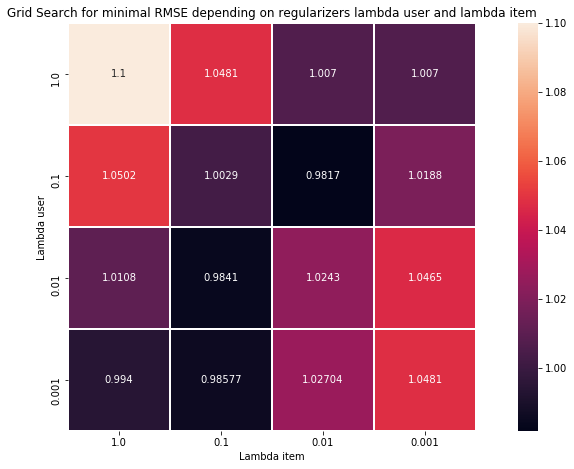

In [187]:
grid = np.matrix([[1.1, 1.0481, 1.007, 1.007],[1.0502, 1.0029, 0.9817, 1.0188],[1.0108, 0.9841, 1.0243, 1.0465],[0.994,0.98577,1.02704,1.0481]])
fig, ax = plt.subplots(figsize=(15, 7.5))
#cmap = sns.light_palette((260, 75, 60), input="husl", reverse = True)
sns.heatmap(grid, ax = ax, square = True, annot = True, linewidth = 0.5, fmt='g')
lambdas_is = [1.0, 0.1, 0.01, 0.001]
lambdas_us = [1.0, 0.1, 0.01, 0.001]
ax.set_xticklabels(lambdas_is)
ax.set_yticklabels(lambdas_us)
ax.set_xlabel("Lambda item")
ax.set_ylabel("Lambda user")
plt.title("Grid Search for minimal RMSE depending on regularizers lambda user and lambda item")

Run the SGD with the best parameters we found on the whole ratings:

In [13]:
best_gamma = 0.025
best_lambda_u = 0.1
best_lambda_i = 0.01
K = 50
num_epochs = 50

user_init, item_init = init_MF(ratings, K)
item_feats_SGD, user_feats_SGD, rmse = matrix_factorization_SGD(ratings, test, best_gamma, K, best_lambda_u, best_lambda_i, num_epochs,
                                                                    user_init, item_init)

Learn the matrix factorization using SGD with K = 50, gamma = 0.025, lambda_i = 0.01, lambda_u = 0.1, num_epochs = 50
iter: 0, RMSE on training set: 1.0496954619678236.
iter: 5, RMSE on training set: 0.9983686241195876.
iter: 10, RMSE on training set: 0.9524652654562149.
iter: 15, RMSE on training set: 0.9302734455252297.
iter: 20, RMSE on training set: 0.9215310043111165.
iter: 25, RMSE on training set: 0.9181243339190256.
iter: 30, RMSE on training set: 0.916771667704421.
iter: 35, RMSE on training set: 0.9162301837893795.


KeyboardInterrupt: 

In [24]:
import pickle

In [14]:
tempt_dir = '../tempt/'
with open(tempt_dir + 'item_feats_SGD.pk','wb') as f:
    pickle.dump(item_feats_SGD, f)
with open(tempt_dir + 'user_feats_SGD.pk','wb') as f:
    pickle.dump(user_feats_SGD, f)

In [42]:
tempt_dir = '../data/'

In [43]:
with open(tempt_dir + 'user_feats_SGD.pk','rb') as f:
    user_feats_SGD = pickle.load(f)
with open(tempt_dir + 'item_feats_SGD.pk','rb') as f:
    item_feats_SGD = pickle.load(f)

In [44]:
predictions = np.dot(item_feats_SGD.T, user_feats_SGD)
print("Shape of predictions (user x items): {}".format(np.shape(predictions)))

Shape of predictions (user x items): (1000, 10000)


### Adding biases

In [7]:
from bias_helpers import computeBiasMatrix

Instead of having $p_{u, i} = \mathbf{w}_i\mathbf{z^{T}}_u$ we would add bias on the user and item by having the following:
$$p_{u, i} = \mu + b_{u} + b_{i} + \mathbf{w}_i\mathbf{z^{T}}_u$$

where $\mu$ is the average of all ratings, $b_{u}$ and $b_{i}$ are the observed deviations of user u and item i respectively from the average (the biases).

Thus we now want to find the best $\mathbf{W}$ and $\mathbf{Z}$ that minimizes the loss:

$$min_{W,Z} \sum_{(u, i) \in \Omega} (r_{u,i} - \mu - b_{u} - b_{i} - \mathbf{W_{u}} \mathbf{Z^{T}_{i}}) + \lambda_{item} (||W||_{F}^{2} + b_{i}^{2}) + \lambda_{user} (||Z||_{F}^{2} + b_{u}^{2}) $$

And we need to compute the gradient of this loss. It is the same as before except we can convert our rating matrix to a biased rating matrix with ratings $r'_{u, i} = r_{u, i} - \mu - b_{u} - b_{i}$ and compute our SGD on this biased matrix

In [8]:
bias_train, mean, bias_u_train, bias_i_train = computeBiasMatrix(train) #ratings for final submissions
bias_test, _, _, _ = computeBiasMatrix(test)

/Users/luke/Documents/Projects/ML/project2/MRS/src/bias_helpers.py:27: RuntimeWarning: invalid value encountered in true_divide
  mean_users = [mean_users[0, i] for i in range(num_users)]/nz_users
/Users/luke/Documents/Projects/ML/project2/MRS/src/bias_helpers.py:29: RuntimeWarning: invalid value encountered in true_divide
  mean_items = [mean_items[i, 0] for i in range(num_items)]/nz_items


(array([], dtype=int64),)

Compute grid search with best parameters (here just with K = 20 features):

In [20]:
# Grid Search:
grid = np.zeros((4, 4)) ### np.zeros((4, 4, 4))
gamma = 0.025 # best gamma we found above
num_epochs = 20
lambdas_user = np.logspace(-3,0,4)[::-1] #From max to min
lambdas_item = np.logspace(-3,0,4)[::-1]
K = 20

min_loss = 100000
best_user_feats = []
best_item_feats = []

### Warm start: directly start computation from previously computed item_features and user_features and not random initialization
user_init, item_init = init_MF(bias_train, K)
for x,lambda_u in enumerate(lambdas_user):
    for y,lambda_i in enumerate(lambdas_item):
        print("K = {}, lambda_u = {}, lambda_i = {}".format(int(K), lambda_u, lambda_i))
        item_feats, user_feats, rmse = matrix_factorization_SGD(bias_train, bias_test, gamma, K, lambda_i,
                                                                 lambda_u, num_epochs, user_init, item_init)
        ### For warm start, we keep the user_features and item_features that gave us the minimal rmse previously computed
        if rmse < min_loss:
            print("New best")
            min_loss = rmse
            user_init = user_feats
            item_init = item_feats
            best_user_feats = np.copy(user_feats)
            best_item_feats = np.copy(item_feats)
        grid[x, y] = rmse

K = 20, lambda_u = 1.0, lambda_i = 1.0
Learn the matrix factorization using SGD with K = 20, lambda_i = 1.0, lambda_u = 1.0, num_epochs = 20


KeyboardInterrupt: 

Compute SGD with the best parameters:

In [9]:
# define parameters
gamma = 0.025
K = 20
lambda_user = 0.1 
lambda_item = 0.001
num_epochs = 20
user_init, item_init = init_MF(bias_train, K)

item_featuresSGD, user_featuresSGD, rmse = matrix_factorization_SGD(bias_train, bias_test, gamma, K, lambda_user, lambda_item, num_epochs, user_init, item_init)

Learn the matrix factorization using SGD with K = 20, gamma = 0.025, lambda_u = 0.1, lambda_i = 0.001,  num_epochs = 20
iter: 0, RMSE on training set: 0.9943391524012675.
iter: 5, RMSE on training set: 0.9599108135455338.
iter: 10, RMSE on training set: 0.9136724640216513.
iter: 15, RMSE on training set: 0.8949050745211748.
iter: 19, RMSE on training set: 0.8892296133254736.


In [22]:
tempt_dir = '../tempt/'
with open(tempt_dir + 'item_featuresSGD.pk','wb') as f:
    pickle.dump(item_featuresSGD, f)
with open(tempt_dir + 'user_featuresSGD.pk','wb') as f:
    pickle.dump(user_featuresSGD, f)

In [16]:
import pickle
tempt_dir = './'
with open(tempt_dir + 'user_features_bias.pk','rb') as f:
    user_featuresSGD = pickle.load(f)
    
with open(tempt_dir + 'item_features_bias.pk','rb') as f:
    item_featuresSGD = pickle.load(f)

Compute the predictions:

In [17]:
# Compute predictions matrix from the biases, item and user features computed with SGD
predictions = predictionsWithBias(item_featuresSGD, user_featuresSGD, bias_u_train, bias_i_train, mean)
print("Shape of predictions (user x items): {}".format(np.shape(predictions)))

Shape of predictions (user x items): (1000, 10000)


In [18]:
### Checking if results appear the same in the final excel file
first_user, first_item = sample_ids[0][0],sample_ids[0][1]
print(first_item, first_user)
print(predictions[first_user - 1, first_item - 1])

1 37
3.9174388550028096


### Submission

Make sure to set the ratings above 5.0 to 5.0 and those below 1.0 to 1.0

In [19]:
predictions[ np.where( predictions > 5.0 ) ] = 5.0
predictions[ np.where(predictions < 1.0)] = 1.0
print("Minimum prediction: {}, Maximum prediction: {}".format(np.min(predictions), np.max(predictions)))

Minimum prediction: 1.0, Maximum prediction: 5.0


In [20]:
print("Shape of predictions (user x items): {}".format(np.shape(predictions)))
wanted_preds = getWantedPredictions(predictions.T, sample_ids)
create_csv_submission(sample_ids, np.round(wanted_preds), sub_dir + "bias_FULL_best_param_50epochs.csv")

Shape of predictions (user x items): (1000, 10000)


In [30]:
sub_dir

'../submit/'